In [1]:
import requests

r = requests.get("https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/regression/housing_scale")# 获取数据集

In [2]:
from io import BytesIO
from sklearn.datasets import load_svmlight_file

X, y = load_svmlight_file(BytesIO(r.content), n_features=14)# 读取实验数据
X = X.toarray()# 转换成arry

In [3]:
import numpy

n_samples, n_features = X.shape# 计算有多少个samples和feature
X = numpy.column_stack((X, numpy.ones((n_samples, 1))))# 再加上一列
y = y.reshape((-1, 1))# 将y转置，换成一列的

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.5)# 切割训练集和测试集

In [5]:
n_train_samples=X_train.shape[0]
n_val_samples=X_val.shape[0]
print(n_train_samples,n_val_samples)

253 253


In [6]:
learning_rate = 0.0005
max_epoch = 200

losses_train = []
losses_val = []

In [7]:
# 不同的初始化参数的方式# 产生的w为n_features+1行，1列的列向量
w = numpy.zeros((n_features + 1, 1))  # initialize with zeros
# w = numpy.random.random((n_features + 1, 1))  # initialize with random numbers
# w = numpy.random.normal(1, 1, size=(n_features + 1, 1))  # initialize with zero normal distribution
#print(w)

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [12]:
import random
from numpy import *

for epoch in range(max_epoch):
    i=random.randint(0,n_train_samples-1)
    diff=numpy.dot(X_train[i],w)-y_train[i]
    # print("diff:",diff)
    w=w-learning_rate*diff*X_train[i].reshape(X_train[i].shape[0],1)# X_train[i].reshape(X_train[i].shape[0],1) 求X_train[i]的转置
    # print("w:",w)
    
    Y_predict = numpy.dot(X_train, w)  # predict under the train set
    loss_train = numpy.average(numpy.abs(Y_predict - y_train))  # calculate the absolute differences
    losses_train.append(loss_train)

    Y_predict = numpy.dot(X_val, w)  # predict under the validation set
    loss_val = numpy.average(numpy.abs(Y_predict - y_val))  # calculate the absolute differences
    losses_val.append(loss_val)

Text(0.5,1,'The graph of absolute diff value varing with the number of iterations')

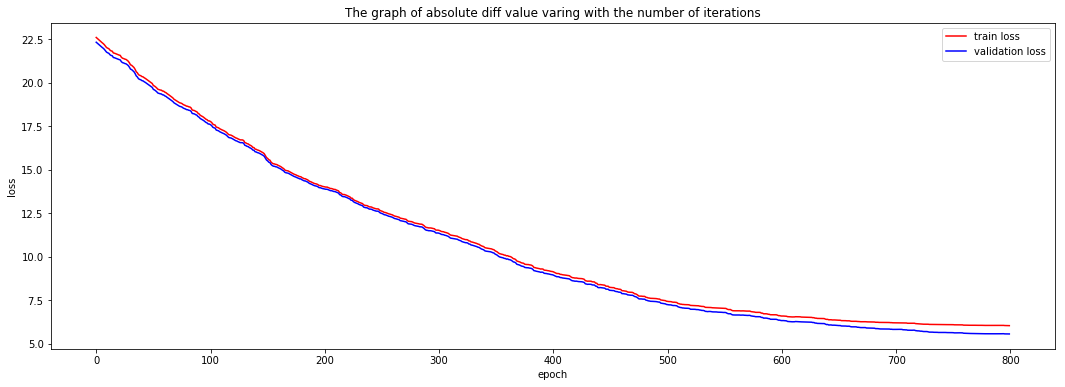

In [13]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.figure(figsize=(18, 6))
plt.plot(losses_train, "-", color="r", label="train loss")
plt.plot(losses_val, "-", color="b", label="validation loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.title("The graph of absolute diff value varing with the number of iterations")